# Data Science TP2

Ning
06 October 2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

# Probability and Statistics

1. For the table of joint probability (given in the assignment), calculate the values:


* $p$<sub>x</sub>$(x)$
* $p$<sub>y</sub>$(y)$
* $p$<sub>x|y</sub>$(x|y = 0)$
* $p$<sub>y|x</sub>$(y|x = 1)$

$p(x=0)$ = $\frac{1}{4}$ + $\frac{1}{2}$ = $\frac{3}{4}$

$p(x=1)$ = $\frac{1}{8}$ + $\frac{1}{8}$ = $\frac{1}{4}$

$p(y=0)$ = $\frac{1}{4}$ + $\frac{1}{8}$ = $\frac{3}{8}$

$p(y=1)$ = $\frac{1}{2}$ + $\frac{1}{8}$ = $\frac{5}{8}$

$p(x=0|y=0)$ = $\frac{p(x|y=0)}{p(y=0)}$ = $\frac{2}{3}$

$p(x=1|y=0)$ = $\frac{1}{3}$

$p(y=0|x=1)$ = $\frac{1}{2}$

$p(y=1|x=1)$ = $\frac{1}{2}$

2. There are two Gaussian (normal) distributions $N(15,81)$ and $N(36,144)$. 

    Gaussian distributions are in the form $N$($\gamma$,$\theta$ <sup>2</sup>), where $\gamma$ is the mean and $\theta$<sup>2</sup> is the standard deviation.

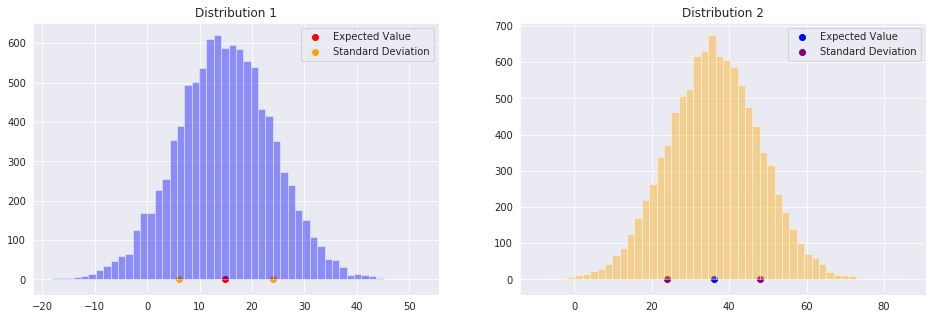

In [2]:
N = 10000
mean1 = 15
variance1 = 81
std1 = math.sqrt(variance1)
mean2 = 36
variance2 = 144
std2 = math.sqrt(variance2)

g1 = np.random.normal(mean1,std1,N)
g2 = np.random.normal(mean2,std2,N)

e_val1 = sum(x*(1/N) for x in g1)
e_val2 = sum(x*(1/N) for x in g2)

f = plt.figure(figsize=(16,5))
with sb.axes_style("darkgrid"):
    ax = f.add_subplot(1,2,1)
    sb.distplot(g1,kde=False,color="blue")
    bx = f.add_subplot(1,2,2)
    sb.distplot(g2,kde=False,color="orange")
    
    ax.scatter(e_val1, 0, color="red", label="Expected Value")
    ax.scatter(mean1-std1,0, color="orange", label="Standard Deviation")
    ax.scatter(mean1+std1,0, color="orange")
    bx.scatter(e_val2, 0, color="blue", label="Expected Value")
    bx.scatter(mean2-std2, 0, color="purple", label="Standard Deviation")
    bx.scatter(mean2+std2, 0, color="purple")
    
    ax.title.set_text('Distribution 1')
    bx.title.set_text('Distribution 2')
    ax.legend(loc="upper right")
    bx.legend(loc="upper right")

The expected value is given by $E(x)$ = $\sum$ x<sub>i</sub>\ p<sub>i</sub>, which is to say that the expected value is the mean of the distribution, since it is the value that you expect to get when you sample from the distribution (since the mean should be the most likely value in a normal distribution).

The variance is denoted by $\theta^2$, and shows you how far a set of values are from the average.

The standard deviation is given by the squareroot of the variance or $sd(x)$ = $\sqrt{\theta^2}$ and gives you the measure of the amount of variance.

The two histograms have different means and variance even though they are both a normal distribution, meaning that the blue histogram's expected value is 15, while the yellow histogram's expected value is 36. The yellow histogram has a larger variance, which we can see because the drop-off from the expected value (top of the normal distribution's peak) on both sides is less steep, meaning that the values are more likely to differ from the expected value (center).

# High-dimensional Gaussian Distribution

In [3]:
#generate 10,000 samples
n = 10000

#from a gaussian distribution centered at 0
d1 = np.zeros(1)
d10 = np.zeros(10)
d100 = np.zeros(100)

#with covariance I
i1 = np.identity(1)
i10 = np.identity(10)
i100 = np.identity(100)

#normal distributions
dim1Gaussian = np.random.multivariate_normal(d1, i1, n)
dim10Gaussian = np.random.multivariate_normal(d10, i10, n)
dim100Gaussian = np.random.multivariate_normal(d100, i100, n)

#plot the norm for every x in dimXGaussian
xnorm = 0
norm1 = [0]*len(dim1Gaussian)
for x in range(0, len(dim1Gaussian)):
    xnorm = 0
    for p in range(0, len(dim1Gaussian[x])):
        xnorm += (dim1Gaussian[x][p])**2
    norm1[x] = math.sqrt(xnorm)

xnorm = 0
norm10 = [0]*len(dim10Gaussian)
for x in range(0, len(dim10Gaussian)):
    xnorm = 0
    for p in range(0, len(dim10Gaussian[x])):
        xnorm += (dim10Gaussian[x][p])**2
    norm10[x] = math.sqrt(xnorm)

xnorm = 0
norm100 = [0]*len(dim100Gaussian)
for x in range(0, len(dim100Gaussian)):
    xnorm = 0
    for p in range(0, len(dim100Gaussian[x])):
        xnorm += (dim100Gaussian[x][p])**2
    norm100[x] = math.sqrt(xnorm)

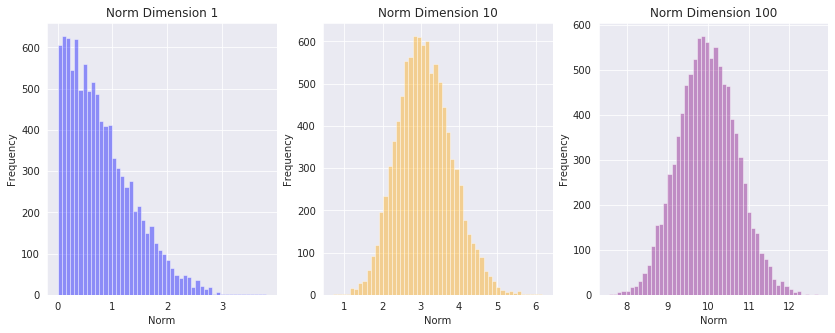

In [4]:
f = plt.figure(figsize=(14,5))
f.tight_layout()
with sb.axes_style("darkgrid"):
    ax = f.add_subplot(1,3,1)
    sb.distplot(norm1,kde=False,color="blue")
    bx = f.add_subplot(1,3,2)
    sb.distplot(norm10,kde=False,color="orange")
    cx = f.add_subplot(1,3,3)
    sb.distplot(norm100,kde=False,color="purple")
    
    
    ax.title.set_text('Norm Dimension 1')
    bx.title.set_text('Norm Dimension 10')
    cx.title.set_text('Norm Dimension 100')
    ax.set(xlabel="Norm", ylabel="Frequency")
    bx.set(xlabel="Norm", ylabel="Frequency")
    cx.set(xlabel="Norm", ylabel="Frequency")
    

The distribution of the norm starts shifting away from 0, meaning that as dimensions increase, we are seeing the distance of each point from the center (calculated by the 2-norm) increase as they shift towards the edges of the distribution.

# Hubness of High Dimensional Data

In [5]:
from sklearn.neighbors import NearestNeighbors

def gen_samples(n, d_start, d_end):

    samples = []
    for i in range(d_start, d_end+1):
        z_cent = np.zeros(i)
        i_var = np.identity(i)
        samples.append(np.random.multivariate_normal(z_cent, i_var, n))
    
    return samples

def calc_max_Ni (sample, k):
    sk_kNN = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(sample)
    sample_d, sample_ind = sk_kNN.kneighbors(sample)
    
    Ni = [0]*len(sample_ind)
    for i in range(0, len(sample_ind)):
        for j in range(0, len(sample_ind)):
            if i in sample_ind[j][1:5]:
                Ni[i] += 1
    return max(Ni)

In [6]:
hub_samples = gen_samples(100, 1, 100)

max_Ni = []
for dim in hub_samples:
    max_Ni.append(calc_max_Ni(dim, 5))

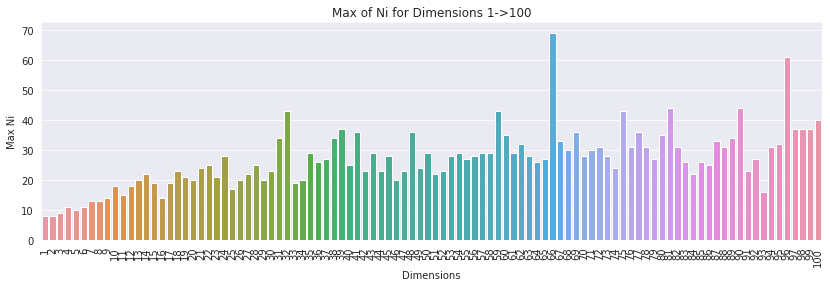

In [7]:
max_Ni_hub = pd.DataFrame({"x":[x for x in range(1,101)], "y":max_Ni})

f = plt.figure(figsize=(14,4))
with sb.axes_style("darkgrid"):
    ax = sb.barplot(x="x", y="y", data=max_Ni_hub)
    ax.title.set_text("Max of Ni for Dimensions 1->100")
    ax.set(xlabel="Dimensions", ylabel="Max Ni")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

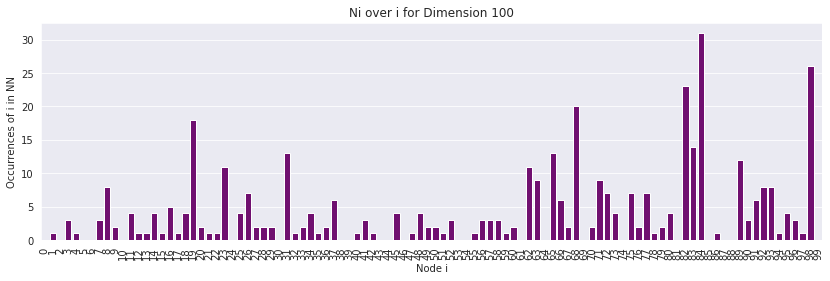

In [8]:
d100 = np.random.multivariate_normal(np.zeros(100),np.identity(100),100)
sk_kNN = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(d100)
d_d100, ind_d100 = sk_kNN.kneighbors(d100)
Ni_100 = [0]*len(ind_d100)
for i in range(0, len(ind_d100)):
    for j in range(0, len(ind_d100)):
        if i in ind_d100[j][1:5]:
            Ni_100[i] += 1
Ni_over_i = pd.DataFrame({"x":[x for x in range(0,100)],"y":Ni_100})               

f = plt.figure(figsize=(14,4))
with sb.axes_style("darkgrid"):
    ax = sb.barplot(x='x', y='y', data=Ni_over_i, color="purple")
    ax.title.set_text("Ni over i for Dimension 100")
    ax.set(xlabel="Node i", ylabel="Occurrences of i in NN")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

As the dimensions increase, the existence of nodes that act as a "hub" increases, meaning that points are concentrating around each other, further and further away from the "center."

# Distribution of Pair-Wise Distances

In [9]:
from sklearn.neighbors import NearestNeighbors
import lhsmdu as lhs

hc1_samples = lhs.sample(1000,1)
hc10_samples = lhs.sample(1000,10)
hc100_samples = lhs.sample(1000,100)

sk_kNN = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(hc1_samples)
d1, ind1 = sk_kNN.kneighbors(hc1_samples)
sk_kNN = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(hc10_samples)
d10, ind10 = sk_kNN.kneighbors(hc10_samples)
sk_kNN = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(hc100_samples)
d100, ind100 = sk_kNN.kneighbors(hc100_samples)

In [10]:
dist1 = []
for i in range(0,len(d1)):
    dist1.append(d1[i][1])
dist10 = []
for i in range(0, len(d10)):
    dist10.append(d10[i][1])
dist100 = []
for i in range(0, len(d100)):
    dist100.append(d100[i][1])

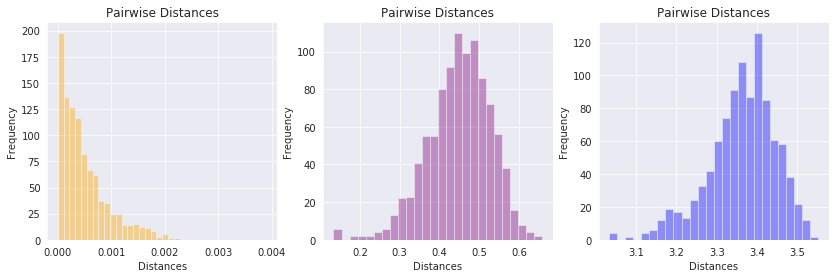

In [11]:
f = plt.figure(figsize=(14,4))
with sb.axes_style("darkgrid"):
    ax = f.add_subplot(1,3,1)
    sb.distplot(dist1, kde=False, color="orange")
    bx = f.add_subplot(1,3,2)
    sb.distplot(dist10, kde=False, color="purple")
    cx = f.add_subplot(1,3,3)
    sb.distplot(dist100, kde=False, color= "blue")
    
    ax.title.set_text("Pairwise Distances")
    ax.set(xlabel="Distances", ylabel="Frequency")
    bx.title.set_text("Pairwise Distances")
    bx.set(xlabel="Distances", ylabel="Frequency")
    cx.title.set_text("Pairwise Distances")
    cx.set(xlabel="Distances", ylabel="Frequency")

The pairwise distance between points increases as we increase dimensions, further and further away from zero.

In [12]:
hc1_samples = lhs.sample(1000,1)
hc5_samples = lhs.sample(1000,5)
hc10_samples = lhs.sample(1000,10)
hc50_samples = lhs.sample(1000,50)
hc100_samples = lhs.sample(1000,100)

sk_kNN = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(hc1_samples)
d1, ind1 = sk_kNN.kneighbors(hc1_samples)
sk_kNN = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(hc5_samples)
d5, ind5 = sk_kNN.kneighbors(hc5_samples)
sk_kNN = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(hc10_samples)
d10, ind10 = sk_kNN.kneighbors(hc10_samples)
sk_kNN = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(hc50_samples)
d50, ind50 = sk_kNN.kneighbors(hc50_samples)
sk_kNN = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(hc100_samples)
d100, ind100 = sk_kNN.kneighbors(hc100_samples)

dist1 = []
for i in range(0,len(d1)):
    dist1.append(d1[i][1])
dist5 = []
for i in range(0,len(d5)):
    dist5.append(d5[i][1])
dist10 = []
for i in range(0, len(d10)):
    dist10.append(d10[i][1])
dist50 = []
for i in range(0, len(d50)):
    dist50.append(d50[i][1])
dist100 = []
for i in range(0, len(d100)):
    dist100.append(d100[i][1])

avg1 = 0
for i in range(0,len(dist1)):
    avg1 += dist1[i]
avg1 = avg1/len(dist1)
avg5 = 0
for i in range(0,len(dist5)):
    avg5 += dist5[i]
avg5 = avg5/len(dist5)
avg10 = 0
for i in range(0,len(dist10)):
    avg10 += dist10[i]
avg10 = avg10/len(dist10)
avg50 = 0
for i in range(0,len(dist50)):
    avg50 += dist50[i]
avg50 = avg50/len(dist50)
avg100 = 0
for i in range(0,len(dist100)):
    avg100 += dist100[i]
avg100 = avg100/len(dist100)

In [13]:
func_of_d = [1, 5, 10, 50, 100]
avg_of_ds = [avg1, avg5, avg10, avg10, avg100]
is_x_local = pd.DataFrame({"x":func_of_d,"y":avg_of_ds})

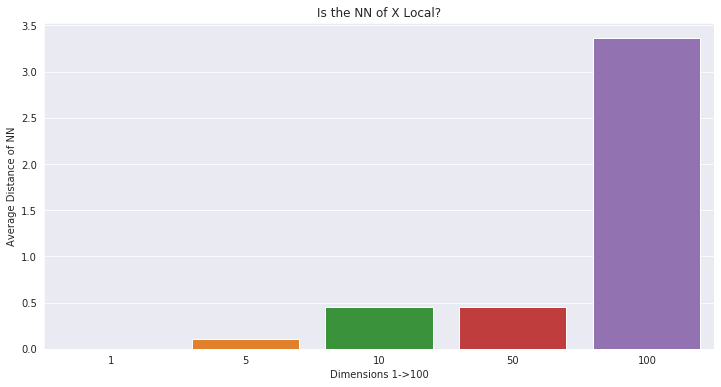

In [14]:
f = plt.figure(figsize=(12,6))
with sb.axes_style("darkgrid"):
    ax = sb.barplot(x="x", y="y", data=is_x_local)
    
    ax.title.set_text("Is the NN of X Local?")
    ax.set(xlabel="Dimensions 1->100", ylabel="Average Distance of NN")

In high dimensional space, the nearest neighbor of X is no longer local, since an increase in dimensions increases (significantly) the distance between x and its nearest neighbor.